In [18]:
import cv2
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

In [33]:
video = cv2.VideoCapture('../videos/vid.mp4')

if not video.isOpened():
    print("Could not open video")

In [34]:
ok, frame = video.read()
if not ok:
    print('Cannot read video file')

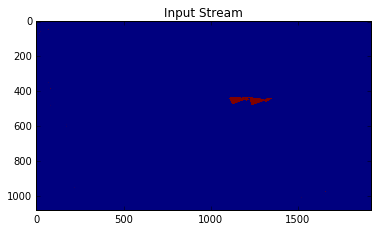

In [35]:
start = time.time()

try:
    for i in range(10):
        # Read a new frame
        ok, frame2 = video.read()
        
        if not ok:
            print('not ok')
            break
        
        diff = cv2.absdiff(frame2, frame)
        diff_gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
        diff_mask = diff_gray > 20
            
        # Turn off the axis
        axis('on')
        # Title of the window
        title("Input Stream")
        # Display the frame
        imshow(diff_mask)
        show()
        # Display the frame until new frame is available
        clear_output(wait=True)
        
        frame = frame2
        
except KeyboardInterrupt:
    # Release the Video Device
    video.release()
    # Message to be displayed after releasing the device
    print("Released Video Resource")



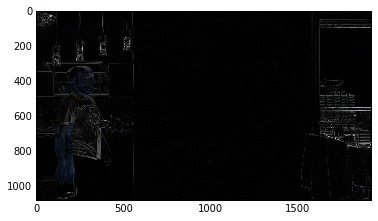

In [28]:
plt.figure()
plt.imshow(diff)

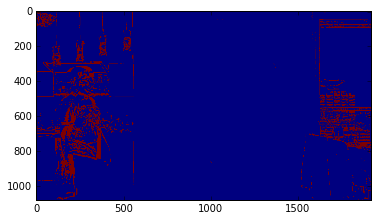

In [29]:
diff_gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
plt.figure()

diff_mask = diff_gray > 20
plt.imshow(diff_mask)

#plt.hist(diff_gray.ravel(), bins=256)